In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='36acdc1b-750e-4222-8880-41a67cdc67e8', project_access_token='p-559eff8446eb98321ebc42e09fb2f9e821eff21d')
pc = project.project_context


In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_d583ed9871cd4c0f989be20d8872167e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='h4exCf2xcJRKgCMgPoOnPF8CPOAk9ew793BNH4xnpzVU',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_d583ed9871cd4c0f989be20d8872167e.get_object(Bucket='enem-donotdelete-pr-f37xxxvx7xl1ht',Key='MICRODADOS_ENEM_ESCOLA.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body, sep=';', encoding='iso-8859-1')
df.head()



,NU_ANO,CO_UF_ESCOLA,SG_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,NO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,...,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA
0,2014,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,145,...,718.53,NaN,NaN,NaN,61.6,86.03,95.4,4.6,0.0,Maior que 90 alunos
1,2015,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,137,...,732.00,NaN,NaN,Grupo 6,67.5,78.46,96.1,3.9,0.0,Maior que 90 alunos
2,2007,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,144,...,NaN,NaN,69.03,NaN,NaN,NaN,91.9,8.1,0.0,Maior que 90 alunos
3,2006,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,184,...,NaN,NaN,57.82,NaN,NaN,NaN,NaN,NaN,NaN,Maior que 90 alunos
4,2009,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,220,...,707.29,NaN,NaN,NaN,NaN,NaN,95.5,4.5,0.0,Maior que 90 alunos


In [3]:
df_2015 = df[df['NU_ANO'] == 2015]

In [4]:
df.shape

(172305, 27)

In [5]:
df_2015.shape

(15598, 27)

In [6]:
df_2015.head()

,NU_ANO,CO_UF_ESCOLA,SG_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,NO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,...,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA
1,2015,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,137,...,732.00,NaN,NaN,Grupo 6,67.5,78.46,96.1,3.9,0.0,Maior que 90 alunos
16,2015,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,20,...,507.82,NaN,NaN,Grupo 4,58.3,70.59,94.6,5.4,0.0,De 1 a 30 alunos
36,2015,11,RO,1100205,Porto Velho,11000198,CENTRO EDUCACIONAL OBJETIVO,4,1,39,...,652.43,NaN,NaN,Grupo 5,67.7,40.54,90.1,9.9,0.0,De 31 a 60 alunos
39,2015,11,RO,1100205,Porto Velho,11000244,COLEGIO DOM BOSCO,4,1,55,...,591.84,NaN,NaN,Grupo 5,56.0,81.63,88.7,10.5,0.8,De 31 a 60 alunos
48,2015,11,RO,1100205,Porto Velho,11000252,CENTRO EDUCACIONAL OBJETIVO - UNIDADE JARDIM A...,4,1,26,...,583.48,NaN,NaN,Grupo 5,72.7,52.17,84.5,13.1,2.4,De 1 a 30 alunos


In [7]:
list(df_2015)

['NU_ANO',
 'CO_UF_ESCOLA',
 'SG_UF_ESCOLA',
 'CO_MUNICIPIO_ESCOLA',
 'NO_MUNICIPIO_ESCOLA',
 'CO_ESCOLA_EDUCACENSO',
 'NO_ESCOLA_EDUCACENSO',
 'TP_DEPENDENCIA_ADM_ESCOLA',
 'TP_LOCALIZACAO_ESCOLA',
 'NU_MATRICULAS',
 'NU_PARTICIPANTES_NEC_ESP',
 'NU_PARTICIPANTES',
 'NU_TAXA_PARTICIPACAO',
 'NU_MEDIA_CN',
 'NU_MEDIA_CH',
 'NU_MEDIA_LP',
 'NU_MEDIA_MT',
 'NU_MEDIA_RED',
 'NU_MEDIA_OBJ',
 'NU_MEDIA_TOT',
 'INSE',
 'PC_FORMACAO_DOCENTE',
 'NU_TAXA_PERMANENCIA',
 'NU_TAXA_APROVACAO',
 'NU_TAXA_REPROVACAO',
 'NU_TAXA_ABANDONO',
 'PORTE_ESCOLA']

In [8]:
df_2015 = df_2015.drop(columns=['NU_ANO','CO_UF_ESCOLA','CO_MUNICIPIO_ESCOLA','CO_ESCOLA_EDUCACENSO'])

In [9]:
df_2015.shape

(15598, 23)

In [10]:
df_2015.dtypes

SG_UF_ESCOLA                  object
NO_MUNICIPIO_ESCOLA           object
NO_ESCOLA_EDUCACENSO          object
TP_DEPENDENCIA_ADM_ESCOLA      int64
TP_LOCALIZACAO_ESCOLA          int64
NU_MATRICULAS                  int64
NU_PARTICIPANTES_NEC_ESP     float64
NU_PARTICIPANTES               int64
NU_TAXA_PARTICIPACAO         float64
NU_MEDIA_CN                  float64
NU_MEDIA_CH                  float64
NU_MEDIA_LP                  float64
NU_MEDIA_MT                  float64
NU_MEDIA_RED                 float64
NU_MEDIA_OBJ                 float64
NU_MEDIA_TOT                 float64
INSE                          object
PC_FORMACAO_DOCENTE          float64
NU_TAXA_PERMANENCIA          float64
NU_TAXA_APROVACAO            float64
NU_TAXA_REPROVACAO           float64
NU_TAXA_ABANDONO             float64
PORTE_ESCOLA                  object
dtype: object

In [11]:
df_2015['SG_UF_ESCOLA'] = df_2015['SG_UF_ESCOLA'].astype(str)
df_2015['NO_MUNICIPIO_ESCOLA'] = df_2015['NO_MUNICIPIO_ESCOLA'].astype(str)
df_2015['NO_ESCOLA_EDUCACENSO'] = df_2015['NO_ESCOLA_EDUCACENSO'].astype(str)
df_2015['TP_DEPENDENCIA_ADM_ESCOLA'] = df_2015['TP_DEPENDENCIA_ADM_ESCOLA'].astype(str)
df_2015['TP_LOCALIZACAO_ESCOLA'] = df_2015['TP_LOCALIZACAO_ESCOLA'].astype(str)
df_2015['INSE'] = df_2015['INSE'].astype(str)
df_2015['PORTE_ESCOLA'] = df_2015['PORTE_ESCOLA'].astype(str)

In [12]:
df_2015.dtypes

SG_UF_ESCOLA                  object
NO_MUNICIPIO_ESCOLA           object
NO_ESCOLA_EDUCACENSO          object
TP_DEPENDENCIA_ADM_ESCOLA     object
TP_LOCALIZACAO_ESCOLA         object
NU_MATRICULAS                  int64
NU_PARTICIPANTES_NEC_ESP     float64
NU_PARTICIPANTES               int64
NU_TAXA_PARTICIPACAO         float64
NU_MEDIA_CN                  float64
NU_MEDIA_CH                  float64
NU_MEDIA_LP                  float64
NU_MEDIA_MT                  float64
NU_MEDIA_RED                 float64
NU_MEDIA_OBJ                 float64
NU_MEDIA_TOT                 float64
INSE                          object
PC_FORMACAO_DOCENTE          float64
NU_TAXA_PERMANENCIA          float64
NU_TAXA_APROVACAO            float64
NU_TAXA_REPROVACAO           float64
NU_TAXA_ABANDONO             float64
PORTE_ESCOLA                  object
dtype: object

In [13]:
print(df_2015['SG_UF_ESCOLA'].value_counts())
print(df_2015['NO_MUNICIPIO_ESCOLA'].value_counts())
print(df_2015['NO_ESCOLA_EDUCACENSO'].value_counts())
print(df_2015['TP_DEPENDENCIA_ADM_ESCOLA'].value_counts())
print(df_2015['TP_LOCALIZACAO_ESCOLA'].value_counts())
print(df_2015['INSE'].value_counts())
print(df_2015['PORTE_ESCOLA'].value_counts())

SP    3350
MG    1685
RJ    1417
RS    1112
CE     838
PR     708
BA     672
SC     649
PE     643
GO     641
ES     393
PB     390
MA     343
PI     338
PA     331
MT     309
MS     278
RN     266
AL     211
SE     189
DF     187
TO     172
AM     164
RO     163
AP      58
AC      55
RR      36
Name: SG_UF_ESCOLA, dtype: int64
São Paulo                    701
Rio de Janeiro               463
Fortaleza                    284
Brasília                     187
Belo Horizonte               181
Salvador                     164
Recife                       148
Goiânia                      131
Belém                        115
Curitiba                     115
Porto Alegre                 113
Manaus                       106
Teresina                     105
São Luís                      96
Maceió                        95
Campo Grande                  86
São Gonçalo                   86
Campinas                      77
João Pessoa                   76
Niterói                       76
Guarulhos 

In [14]:
df_2015.describe()

,NU_MATRICULAS,NU_PARTICIPANTES_NEC_ESP,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO
count,15598.000000,15598.000000,15598.00000,15598.000000,15598.000000,15598.000000,15598.000000,15598.000000,15598.000000,0.0,0.0,15579.000000,15598.000000,15516.000000,15516.000000,15516.000000
mean,85.465765,0.553533,62.53026,76.143559,566.760296,490.865533,515.310694,492.569628,563.765700,NaN,NaN,60.393125,76.322300,87.416177,8.798079,3.785744
std,83.905615,1.325878,61.90255,15.382843,40.158736,47.407539,41.882286,69.048083,77.888398,NaN,NaN,17.222157,50.037961,10.952789,7.915180,5.557789
min,10.000000,0.000000,10.00000,50.000000,456.180000,388.560000,397.090000,372.450000,345.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,23.00000,62.200000,537.070000,456.152500,484.110000,442.812500,508.075000,NaN,NaN,49.600000,69.230000,80.800000,2.800000,0.000000
50%,57.000000,0.000000,42.00000,76.920000,558.930000,476.740000,509.665000,471.345000,546.825000,NaN,NaN,61.900000,80.390000,90.500000,6.700000,0.900000
75%,112.000000,1.000000,80.00000,90.320000,594.310000,519.637500,545.647500,528.317500,609.860000,NaN,NaN,73.000000,88.890000,96.200000,12.700000,6.000000
max,842.000000,27.000000,716.00000,100.000000,721.470000,730.510000,681.230000,873.650000,930.000000,NaN,NaN,100.000000,5822.000000,100.000000,60.200000,85.700000


In [15]:
#atributos vazios. serao apagados
df_2015 = df_2015.drop(columns=['NU_MEDIA_OBJ','NU_MEDIA_TOT'])

In [16]:
x = df_2015['NU_MATRICULAS'].plot.hist()

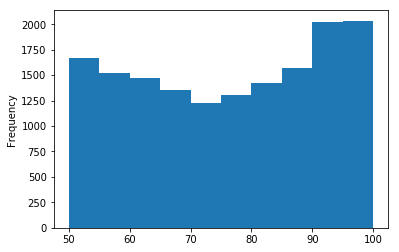

In [17]:
x = df_2015['NU_TAXA_PARTICIPACAO'].plot.hist()

In [18]:
df_2015.describe()

,NU_MATRICULAS,NU_PARTICIPANTES_NEC_ESP,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO
count,15598.000000,15598.000000,15598.00000,15598.000000,15598.000000,15598.000000,15598.000000,15598.000000,15598.000000,15579.000000,15598.000000,15516.000000,15516.000000,15516.000000
mean,85.465765,0.553533,62.53026,76.143559,566.760296,490.865533,515.310694,492.569628,563.765700,60.393125,76.322300,87.416177,8.798079,3.785744
std,83.905615,1.325878,61.90255,15.382843,40.158736,47.407539,41.882286,69.048083,77.888398,17.222157,50.037961,10.952789,7.915180,5.557789
min,10.000000,0.000000,10.00000,50.000000,456.180000,388.560000,397.090000,372.450000,345.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,23.00000,62.200000,537.070000,456.152500,484.110000,442.812500,508.075000,49.600000,69.230000,80.800000,2.800000,0.000000
50%,57.000000,0.000000,42.00000,76.920000,558.930000,476.740000,509.665000,471.345000,546.825000,61.900000,80.390000,90.500000,6.700000,0.900000
75%,112.000000,1.000000,80.00000,90.320000,594.310000,519.637500,545.647500,528.317500,609.860000,73.000000,88.890000,96.200000,12.700000,6.000000
max,842.000000,27.000000,716.00000,100.000000,721.470000,730.510000,681.230000,873.650000,930.000000,100.000000,5822.000000,100.000000,60.200000,85.700000


In [19]:
project.save_data("df_2015.csv", df_2015.to_csv(header=True, index=False), overwrite=True)

{'file_name': 'df_2015.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'enem-donotdelete-pr-f37xxxvx7xl1ht',
 'asset_id': '0f2976c8-132a-43a1-afc1-fd1691a3c7df'}

In [20]:
import numpy as np
print(np.corrcoef(df_2015['NU_MEDIA_LP'], df_2015['NU_MEDIA_MT']))
print(np.corrcoef(df_2015['NU_MEDIA_CN'], df_2015['NU_MEDIA_MT']))
print(np.corrcoef(df_2015['NU_MEDIA_CH'], df_2015['NU_MEDIA_MT']))
print(np.corrcoef(df_2015['NU_MEDIA_RED'], df_2015['NU_MEDIA_MT']))

[[1.         0.90097384]
 [0.90097384 1.        ]]
[[1.         0.92451953]
 [0.92451953 1.        ]]
[[1.         0.95337704]
 [0.95337704 1.        ]]
[[1.         0.85993144]
 [0.85993144 1.        ]]


In [21]:
#criando um dataset para predizer apenas a nota de matematica
#excluindo as outras medias (ciencias, portugues)
df_2015_MT = df_2015.drop(columns=['NU_MEDIA_LP','NU_MEDIA_CN','NU_MEDIA_CH','NU_MEDIA_RED'])

In [22]:
project.save_data("df_2015_MT.csv", df_2015_MT.to_csv(header=True, index=False), overwrite=True)

{'file_name': 'df_2015_MT.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'enem-donotdelete-pr-f37xxxvx7xl1ht',
 'asset_id': 'cbb93c78-afc3-4901-a851-0d638ad66045'}

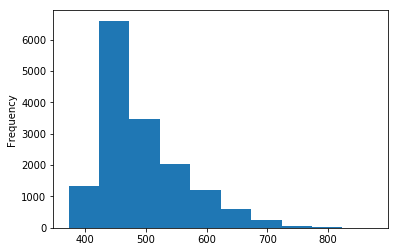

In [23]:
x = df_2015['NU_MEDIA_MT'].plot.hist()

In [24]:
print(np.corrcoef(df_2015['NU_TAXA_PARTICIPACAO'], df_2015['NU_MEDIA_MT']))

[[1.         0.60711416]
 [0.60711416 1.        ]]


In [25]:
print(np.corrcoef(df_2015['NU_TAXA_PERMANENCIA'], df_2015['NU_MEDIA_MT']))

[[1.         0.03073666]
 [0.03073666 1.        ]]


In [35]:
print(np.corrcoef(df_2015['PC_FORMACAO_DOCENTE'], df_2015['NU_MEDIA_MT']))

[[nan nan]
 [nan  1.]]


In [27]:
df_2015.sort_values(by=['NU_MEDIA_MT'], ascending=False).head(20)

,SG_UF_ESCOLA,NO_MUNICIPIO_ESCOLA,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,NU_PARTICIPANTES_NEC_ESP,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,...,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA
122963,SP,São Paulo,OBJETIVO COLEGIO INTEGRADO,4,1,41,0.0,41,100.00,721.47,...,681.23,873.65,813.17,Grupo 6,100.0,78.05,100.0,0.0,0.0,De 31 a 60 alunos
123752,SP,São Paulo,ETAPA III COLEGIO,4,1,35,0.0,32,91.43,705.41,...,650.68,858.77,783.75,Grupo 6,100.0,0.00,100.0,0.0,0.0,De 31 a 60 alunos
25311,CE,Fortaleza,ARI DE SA CAVALCANTE SEDE MARIO MAMEDE COLEGIO,4,1,35,0.0,35,100.00,704.89,...,663.21,851.45,841.14,Grupo 5,72.2,0.00,100.0,0.0,0.0,De 31 a 60 alunos
24937,CE,Fortaleza,ARI DE SA CAVALCANTE COLEGIO - MAJOR FACUNDO,4,1,34,0.0,33,97.06,702.81,...,640.15,845.69,843.64,Grupo 5,89.9,0.00,99.2,0.8,0.0,De 31 a 60 alunos
72217,MG,Belo Horizonte,COLEGIO BERNOULLI - UNIDADE LOURDES,4,1,304,0.0,300,98.68,713.63,...,647.07,837.49,845.87,Grupo 6,70.1,5822.00,94.2,5.8,0.0,Maior que 90 alunos
25309,CE,Fortaleza,FARIAS BRITO COLEGIO DE APLICACAO,4,1,48,0.0,47,97.92,690.50,...,639.71,836.60,762.13,Grupo 5,56.4,0.00,99.5,0.5,0.0,De 31 a 60 alunos
15819,PI,Teresina,INST DOM BARRETO,4,1,129,0.0,124,96.12,693.19,...,645.35,832.80,897.42,Grupo 6,81.9,96.77,85.7,14.3,0.0,Maior que 90 alunos
25313,CE,Fortaleza,CHRISTUS COLEGIO PRE UNIVERSITARIO,4,1,60,0.0,59,98.33,701.55,...,648.15,826.86,859.66,Grupo 6,46.2,0.00,100.0,0.0,0.0,De 31 a 60 alunos
72202,MG,Ipatinga,FIBONACCI COLEGIO,4,1,44,0.0,43,97.73,704.64,...,630.94,823.68,797.21,Grupo 6,68.1,62.79,91.7,7.8,0.5,De 31 a 60 alunos
87824,RJ,Rio de Janeiro,COLEGIO E CURSO PONTO DE ENSINO,4,1,46,0.0,44,95.65,685.76,...,624.84,823.24,760.91,Grupo 6,81.5,15.91,74.8,24.3,0.9,De 31 a 60 alunos


In [28]:
df_2015[df_2015['NO_MUNICIPIO_ESCOLA'] == 'São Paulo'].sort_values(by=['NU_MEDIA_MT'], ascending=False).head(10)

,SG_UF_ESCOLA,NO_MUNICIPIO_ESCOLA,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,NU_PARTICIPANTES_NEC_ESP,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,...,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA
122963,SP,São Paulo,OBJETIVO COLEGIO INTEGRADO,4,1,41,0.0,41,100.00,721.47,...,681.23,873.65,813.17,Grupo 6,100.0,78.05,100.0,0.0,0.0,De 31 a 60 alunos
123752,SP,São Paulo,ETAPA III COLEGIO,4,1,35,0.0,32,91.43,705.41,...,650.68,858.77,783.75,Grupo 6,100.0,0.00,100.0,0.0,0.0,De 31 a 60 alunos
117117,SP,São Paulo,VERTICE COLEGIO UNIDADE II,4,1,77,0.0,75,97.40,702.69,...,649.93,792.06,778.13,Grupo 6,71.8,96.00,98.8,1.2,0.0,De 61 a 90 alunos
109276,SP,São Paulo,LICEU DE ARTES E OFICIOS DE SAO PAULO ESCOLA T...,4,1,119,0.0,115,96.64,691.59,...,632.86,782.11,814.26,Grupo 6,53.7,99.13,97.9,2.1,0.0,Maior que 90 alunos
120468,SP,São Paulo,MOBILE COLEGIO,4,1,146,0.0,124,84.93,708.53,...,648.92,779.91,812.42,Grupo 6,97.3,93.55,95.8,4.2,0.0,Maior que 90 alunos
109459,SP,São Paulo,SANTA CRUZ COLEGIO,4,1,233,0.0,204,87.55,694.98,...,636.42,772.54,745.98,Grupo 6,83.3,98.53,98.1,1.9,0.0,Maior que 90 alunos
109529,SP,São Paulo,BANDEIRANTES COLEGIO EFM,4,1,486,2.0,430,88.48,677.00,...,632.39,766.46,705.40,Grupo 6,99.6,95.35,97.3,2.7,0.0,Maior que 90 alunos
114120,SP,São Paulo,ALBERT SABIN COLEGIO,4,1,134,0.0,125,93.28,680.01,...,622.18,747.35,772.00,Grupo 6,87.4,96.00,92.7,7.3,0.0,Maior que 90 alunos
123313,SP,São Paulo,GERMINARE ESCOLA,4,1,72,0.0,68,94.44,668.95,...,621.39,743.58,753.82,Grupo 5,82.1,97.06,97.7,2.3,0.0,De 61 a 90 alunos
116058,SP,São Paulo,AGOSTINIANO MENDEL COLEGIO,4,1,259,0.0,251,96.91,675.23,...,619.24,743.30,728.61,Grupo 6,78.5,99.20,91.2,8.8,0.0,Maior que 90 alunos


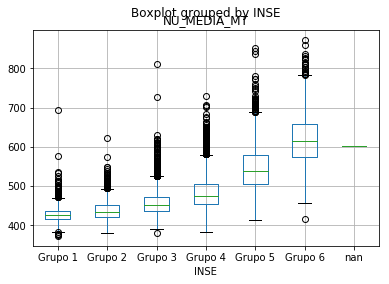

In [29]:
boxplot = df_2015.boxplot(column=['NU_MEDIA_MT'], by='INSE')

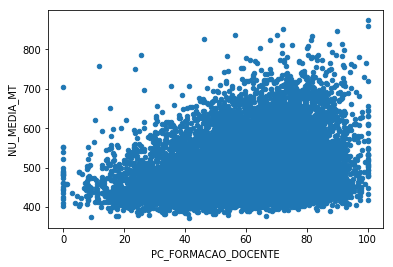

In [31]:
ax1 = df_2015.plot.scatter(x='PC_FORMACAO_DOCENTE',y='NU_MEDIA_MT')

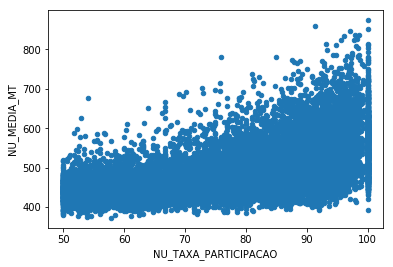

In [38]:
ax1 = df_2015.plot.scatter(x='NU_TAXA_PARTICIPACAO', y='NU_MEDIA_MT')

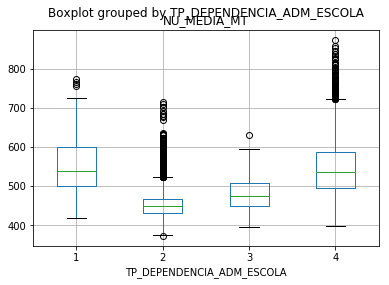

In [36]:
boxplot = df_2015.boxplot(column=['NU_MEDIA_MT'], by='TP_DEPENDENCIA_ADM_ESCOLA')